[View in Colaboratory](https://colab.research.google.com/github/NikhilKorati/Network-Intrusion-Detector/blob/master/KDDCup_99.ipynb)

# **Network Intrusion Classifier**

Classify network intrusion as good or bad using Machine Learning techniques

Based on the KDD Cup 1999 dataset




## Get the Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!wget 'https://www.dropbox.com/s/7pi7mhpc0n4stxy/kddcup.data_10_percent.gz'



--2018-05-31 00:42:04--  https://www.dropbox.com/s/7pi7mhpc0n4stxy/kddcup.data_10_percent.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/cGw3XSLhC2SoDiWYz3IojYRAPc7Tdxp6kkif4uzfrvJShRDBnqmHAxT02HqL34bi/file [following]
--2018-05-31 00:42:05--  https://dl.dropboxusercontent.com/content_link/cGw3XSLhC2SoDiWYz3IojYRAPc7Tdxp6kkif4uzfrvJShRDBnqmHAxT02HqL34bi/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.81.6, 2620:100:6031:6::a27d:5106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.81.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/octet-stream]
Saving to: ‘kddcup.data_10_percent.gz.4’

kddcup.data_10_perc 100%[===================>]   2.04M  1.19MB/s

In [0]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

network_raw_df = pd.read_csv('kddcup.data_10_percent.gz', compression='gzip', header=None, sep=',', names = col_names)

In [4]:
network_raw_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
network_raw_df.shape

(494021, 42)

In [6]:
network_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

In [7]:
network_raw_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Analysis

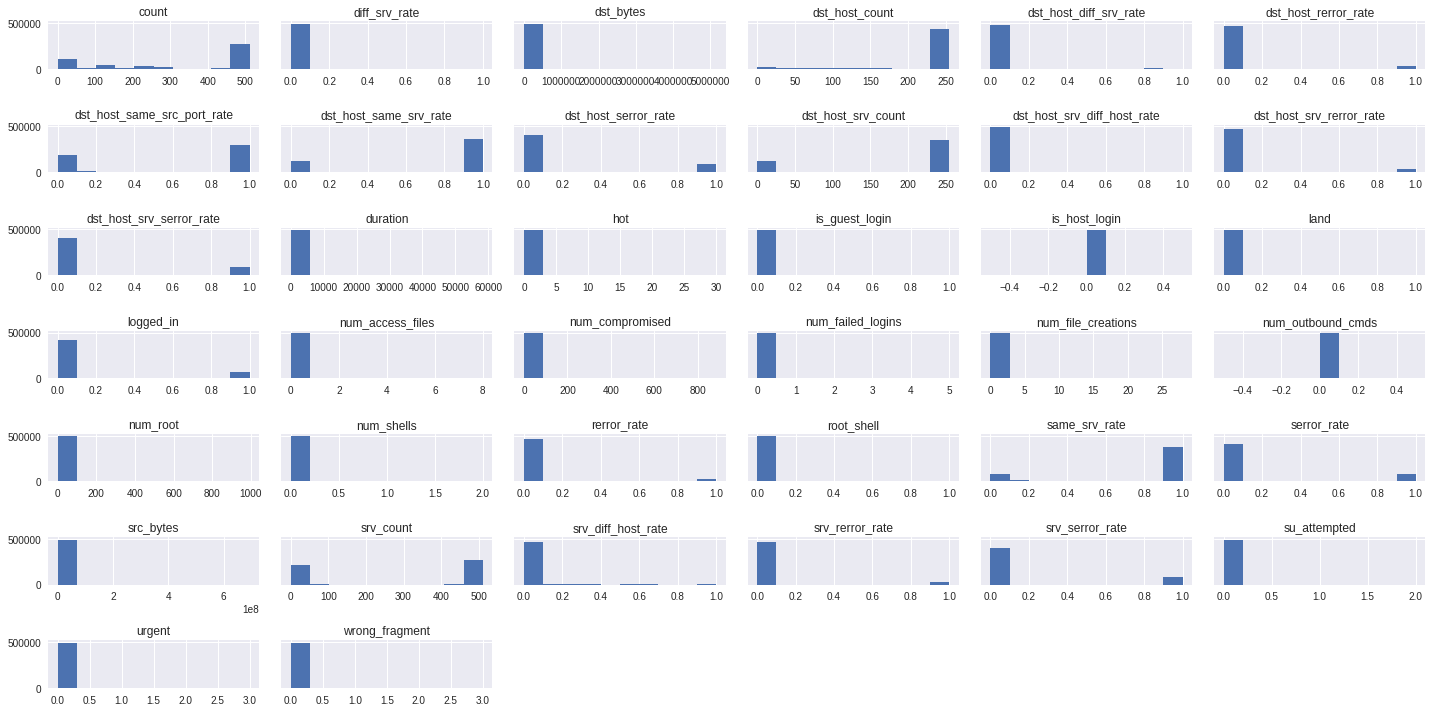

In [13]:
network_raw_df.hist(figsize= (20,10), sharey=True);
plt.tight_layout();
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


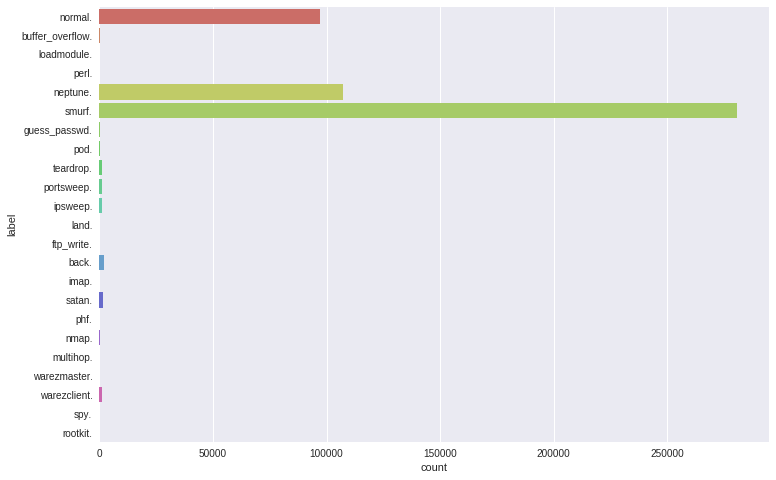

In [8]:
plt.subplots(figsize=(12,8))
sns.countplot(y = 'label', data=network_raw_df, palette='hls')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


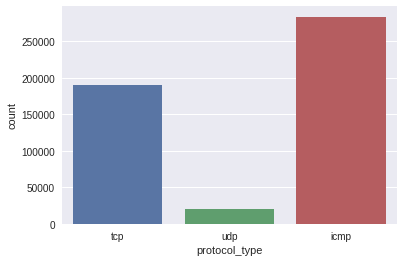

In [9]:
sns.countplot(x = 'protocol_type', data=network_raw_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


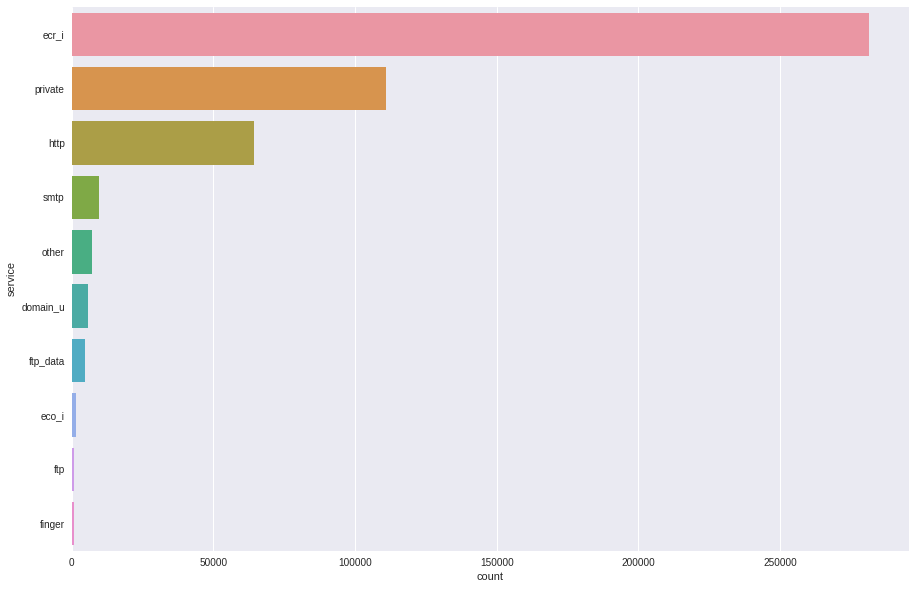

In [10]:
plt.subplots(figsize=(15,10))
sns.countplot(y = 'service', 
              data = network_raw_df, 
              order=network_raw_df['service'].value_counts().iloc[:10].index)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


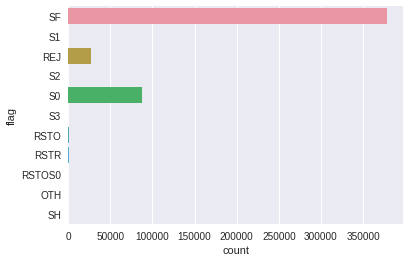

In [11]:
sns.countplot(y = 'flag', data = network_raw_df)

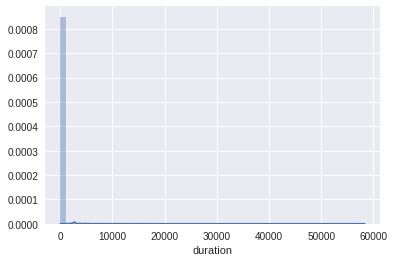

In [12]:
sns.distplot(network_raw_df['duration'])

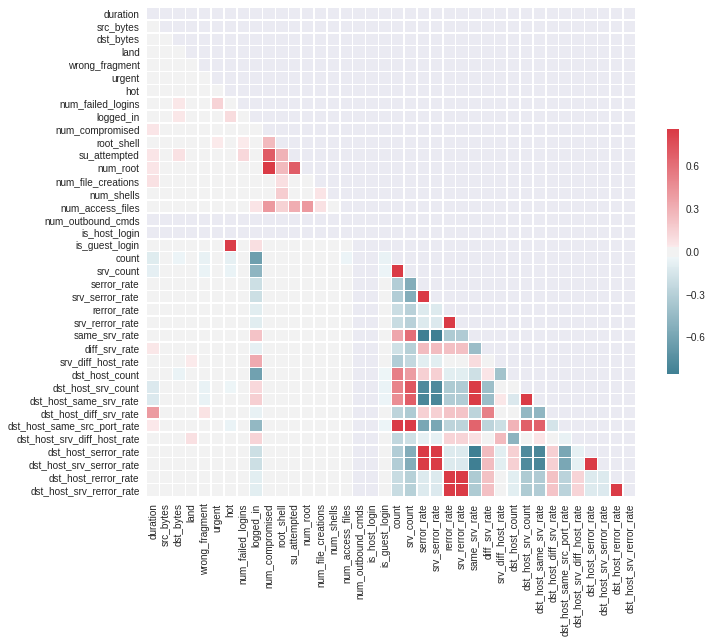

In [13]:
d_corr = network_raw_df.corr()

mask = np.zeros_like(d_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(d_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
corr_df = pd.DataFrame(d_corr.unstack().sort_values(kind='quicksort').dropna(), columns = ['corr'])
corr_df = corr_df[(corr_df['corr'] > 0.83) | (corr_df['corr'] < -0.83)]
corr_df = corr_df[corr_df['corr']!= 1]
corr_df.drop_duplicates()

corr
same_srv_rate            serror_rate                 -0.858247
dst_host_serror_rate     same_srv_rate               -0.857835
dst_host_srv_serror_rate same_srv_rate               -0.857544
srv_serror_rate          same_srv_rate               -0.857060
is_guest_login           hot                          0.843572
count                    dst_host_same_src_port_rate  0.860579
dst_host_srv_count       same_srv_rate                0.898955
same_srv_rate            dst_host_same_srv_rate       0.927808
srv_count                count                        0.943667
                         dst_host_same_src_port_rate  0.944926
dst_host_srv_count       dst_host_same_srv_rate       0.973685
srv_rerror_rate          dst_host_rerror_rate         0.982166
dst_host_srv_rerror_rate dst_host_rerror_rate         0.984804
rerror_rate              dst_host_srv_rerror_rate     0.985200
dst_host_srv_rerror_rate srv_rerror_rate              0.986571
dst_host_rerror_rate     rerror_rate                  0.986995
num_root                 num_compromised              0.993828
srv_rerror_rate          rerror_rate                  0.994731
dst_host_serror_rate     srv_serror_rate              0.997835
serror_rate              dst_host_srv_serror_rate     0.997849
dst_host_srv_serror_rate dst_host_serror_rate         0.998156
srv_serror_rate          serror_rate                  0.998362
dst_host_serror_rate     serror_rate                  0.998673
dst_host_srv_serror_rate srv_serror_rate              0.999304

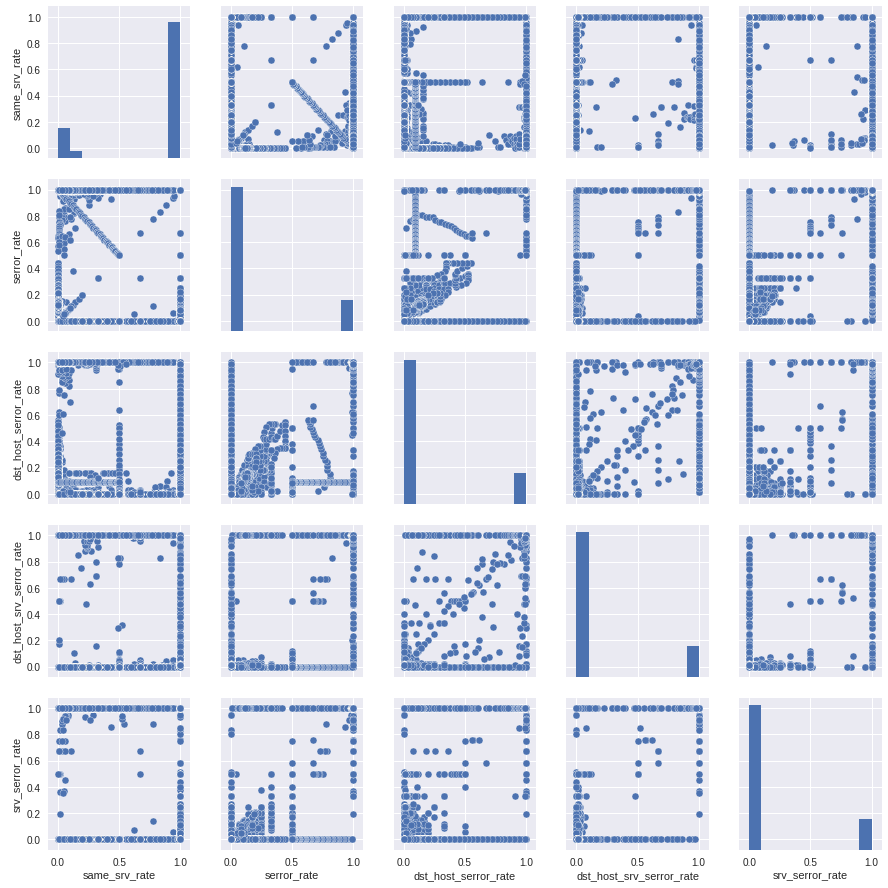

In [15]:
sns.pairplot(data=network_raw_df, vars=['same_srv_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'srv_serror_rate'])

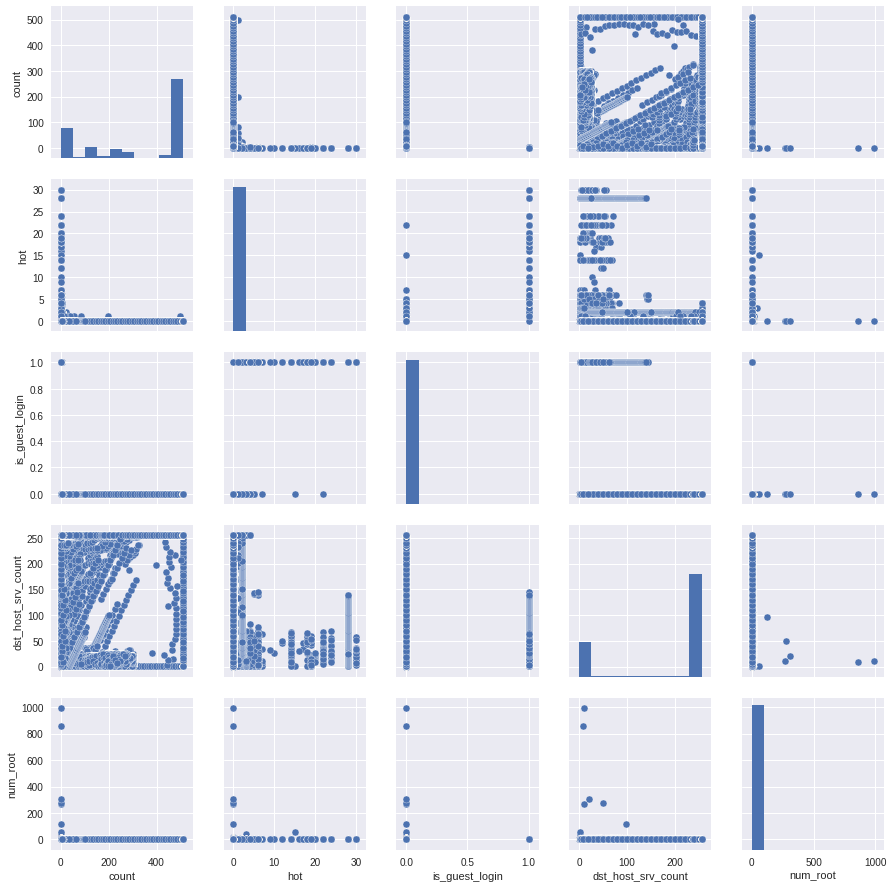

In [16]:
sns.pairplot(data = network_raw_df, vars = ['count' ,'hot', 'is_guest_login', 'dst_host_srv_count', 'num_root'])

## Statistical Tests

In [0]:
processed_network_df = network_raw_df

In [5]:
categorical_features = ['protocol_type', 'service', 'flag', 'label']
all_columns = processed_network_df.columns.values.tolist()
numerical_features = [feature for feature in all_columns if feature not in categorical_features]
numerical_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [16]:
!pip install  yellowbrick

    100% |████████████████████████████████| 225kB 3.0MB/s 


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


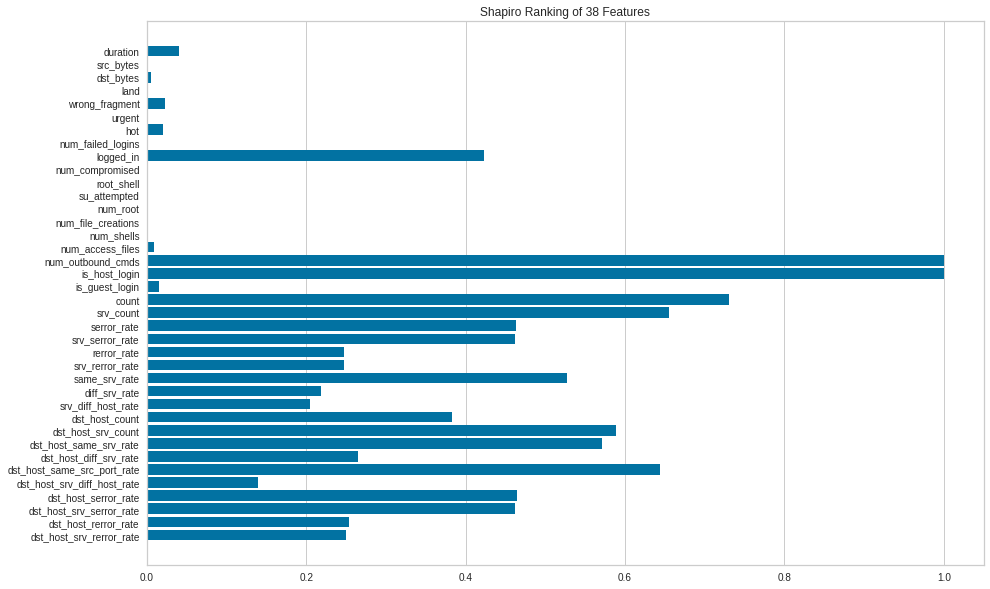

In [17]:
from yellowbrick.features import Rank1D
from sklearn.preprocessing import LabelEncoder

processed_network_df['label'] = LabelEncoder().fit_transform(processed_network_df['label'])

ShapX = processed_network_df[numerical_features].as_matrix()
ShapY = processed_network_df['label'].as_matrix()

visualizer = Rank1D(features=numerical_features, algorithm='shapiro')

plt.subplots(figsize=(15,10))
visualizer.fit(ShapX, ShapY)                
visualizer.transform(ShapX)             
visualizer.poof() 

## Classification Model Building

In [0]:
model_network_df = network_raw_df

In [0]:
sep_label = [i for i in model_network_df.columns.values.tolist() if i not in ['label']]
data_new = model_network_df[sep_label]

dummy_columns = ['protocol_type', 'service', 'flag']

for cat in dummy_columns:
    dummy_cols = pd.get_dummies(model_network_df[cat], prefix=cat, drop_first=True)
    data_new = data_new.join(dummy_cols)

In [8]:
data_vars  = data_new.columns.values.tolist()
to_keep = [i for i in data_vars if i not in categorical_features]
to_keep

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'se

In [9]:
final_network_df = data_new[to_keep]
final_network_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
model_network_df[model_network_df['label']!='normal.'] = 'attack.'


label_encoder_y = LabelEncoder()
model_network_df['label'] = label_encoder_y.fit_transform(model_network_df['label'])
model_network_df['label'].value_counts()


0    396743
1     97278
Name: label, dtype: int64

##Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

final_network_df[numerical_features] = scaler.fit_transform(final_network_df[numerical_features])
final_network_df[numerical_features].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,...,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05
mean,2.171810e-17,6.508237e-19,4.717573e-18,-7.493462e-18,3.106694e-18,2.277883e-18,-2.035173e-17,-1.574922e-17,-2.761506e-16,-1.510199e-18,...,6.811715e-17,-1.348536e-16,3.352929e-16,5.488494e-17,1.988284e-16,2.807531e-17,3.129707e-17,-5.983263e-17,1.822594e-16,-5.845188e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.779172e-02,-3.061686e-03,-2.628733e-02,-6.673418e-03,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-4.171917e-01,-5.678684e-03,...,-3.590542e+00,-1.779188e+00,-1.834994e+00,-2.828667e-01,-1.250621e+00,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
25%,-6.779172e-02,-3.016149e-03,-2.628733e-02,-6.673418e-03,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-4.171917e-01,-5.678684e-03,...,3.479668e-01,-1.345391e+00,-8.368938e-01,-2.828667e-01,-1.250621e+00,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
50%,-6.779172e-02,-2.535486e-03,-2.628733e-02,-6.673418e-03,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-4.171917e-01,-5.678684e-03,...,3.479668e-01,6.255576e-01,5.993962e-01,-2.828667e-01,8.270476e-01,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
75%,-6.779172e-02,-2.017381e-03,-2.628733e-02,-6.673418e-03,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-4.171917e-01,-5.678684e-03,...,3.479668e-01,6.255576e-01,5.993962e-01,8.323588e-02,8.270476e-01,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
max,8.234740e+01,7.016400e+02,1.560110e+02,1.498483e+02,2.220663e+01,5.444371e+02,3.831404e+01,3.221639e+02,2.396980e+00,4.915630e+02,...,3.479668e-01,6.255576e-01,5.993962e-01,8.869697e+00,8.270476e-01,2.357583e+01,2.163063e+00,2.162027e+00,4.084676e+00,4.095715e+00


In [0]:
y = ['label']
X = final_network_df.columns.values.tolist()

##RFE

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()


feature_sel_cols = RFE(logistic, 25)
feature_sel_cols = feature_sel_cols.fit(final_network_df[X], model_network_df[y])
print('Features sorted by their rank:')
sorted(zip(map(lambda X: round(X, 4), feature_sel_cols.ranking_), X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features sorted by their rank:


[(1, 'count'),
 (1, 'diff_srv_rate'),
 (1, 'dst_host_count'),
 (1, 'dst_host_rerror_rate'),
 (1, 'dst_host_same_src_port_rate'),
 (1, 'dst_host_same_srv_rate'),
 (1, 'dst_host_serror_rate'),
 (1, 'dst_host_srv_count'),
 (1, 'dst_host_srv_diff_host_rate'),
 (1, 'flag_REJ'),
 (1, 'flag_S0'),
 (1, 'hot'),
 (1, 'is_guest_login'),
 (1, 'protocol_type_udp'),
 (1, 'rerror_rate'),
 (1, 'same_srv_rate'),
 (1, 'service_auth'),
 (1, 'service_ftp'),
 (1, 'service_imap4'),
 (1, 'service_pop_3'),
 (1, 'service_private'),
 (1, 'service_smtp'),
 (1, 'service_urp_i'),
 (1, 'srv_rerror_rate'),
 (1, 'wrong_fragment'),
 (2, 'flag_RSTR'),
 (3, 'dst_bytes'),
 (4, 'dst_host_diff_srv_rate'),
 (5, 'srv_serror_rate'),
 (6, 'flag_S1'),
 (7, 'service_tim_i'),
 (8, 'service_eco_i'),
 (9, 'logged_in'),
 (10, 'service_ecr_i'),
 (11, 'service_whois'),
 (12, 'service_login'),
 (13, 'dst_host_srv_serror_rate'),
 (14, 'num_access_files'),
 (15, 'service_finger'),
 (16, 'root_shell'),
 (17, 'service_telnet'),
 (18, 'serv

In [0]:
X = ['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_rerror_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count',\
    'dst_host_srv_diff_host_rate', 'flag_REJ', 'flag_S0', 'hot', 'is_guest_login', 'protocol_type_udp', 'rerror_rate', 'same_srv_rate', 'service_auth', 'service_ftp', 'service_imap4',\
    'service_pop_3', 'service_private', 'service_smtp', 'service_urp_i', 'srv_rerror_rate', 'wrong_fragment', 'flag_RSTR', 'dst_bytes', 'dst_host_diff_srv_rate', 'srv_serror_rate', 'flag_S1', \
    'service_tim_i', 'service_eco_i', 'logged_in', 'service_ecr_i', 'service_whois', 'service_login', 'dst_host_srv_serror_rate', 'num_access_files', 'service_finger']


## Principal Component Analysis

## SMOTE

In [0]:
!pip install imblearn

In [0]:
import imblearn 
from imblearn.over_sampling import SMOTE

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_network_df[X], model_network_df[y], random_state=0)

In [34]:
y_train.value_counts()

0    297479
1     73036
Name: label, dtype: int64

In [0]:
sm = SMOTE(random_state=12, ratio = 'minority')
X_train, y_train = sm.fit_sample(X_train, y_train)